# Telcom Customer Churn

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


i have collected my DataSets from Kaggle 
detail:-
link:-https://www.kaggle.com/code/nightcrawler101/customer-churn-prediction/input
Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Load the Datasets

In [4]:
import os
for dirname, _, filenames in os.walk('https://www.kaggle.com/code/nightcrawler101/customer-churn-prediction/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


#### Data Cleaning: Check for missing values

In [38]:
missing_values = db.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### Data Exploration (EDA)

In [5]:
db = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   object
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   object
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [35]:
db.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7043,7043
unique,7043,2,2,2,2,73,2,3,3,3,...,3,3,3,3,3,2,4,1585.00,6531,2
top,7590-VHVEG,Male,0,0,0,1,1,0,1,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,0
freq,1,3555,5901,3641,4933,613,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,61.00,11,5174


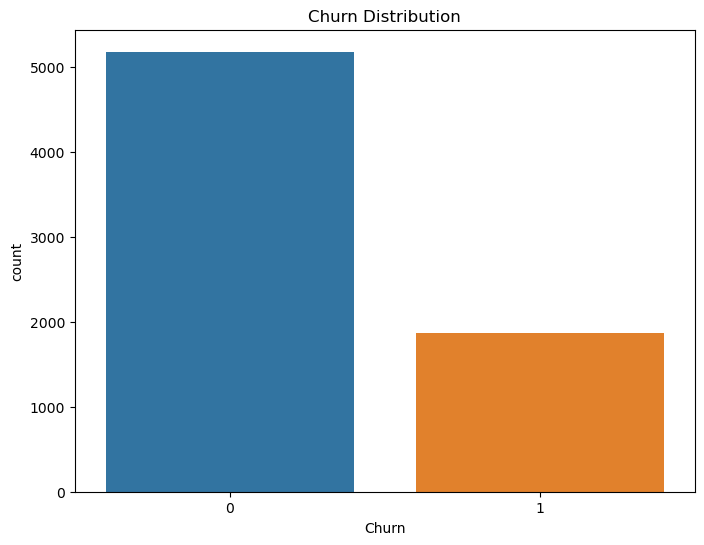

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the data
plt.figure(figsize=(8, 6))
sns.countplot(data=db, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.show()




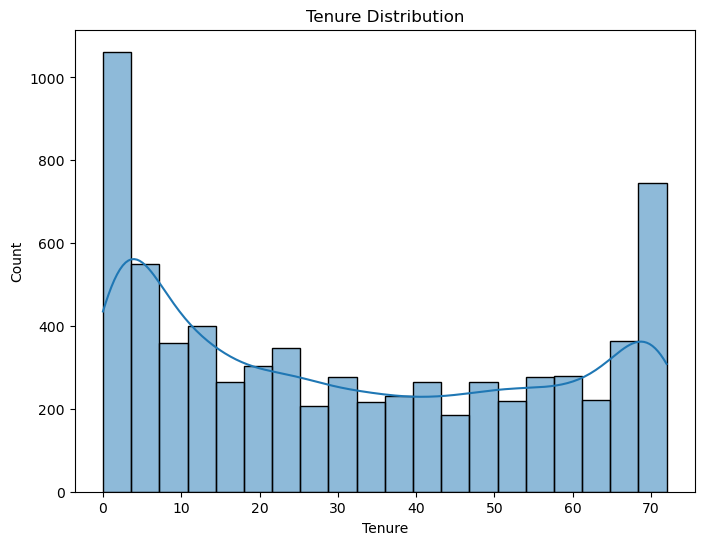

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=db, x='tenure', bins=20, kde=True)
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

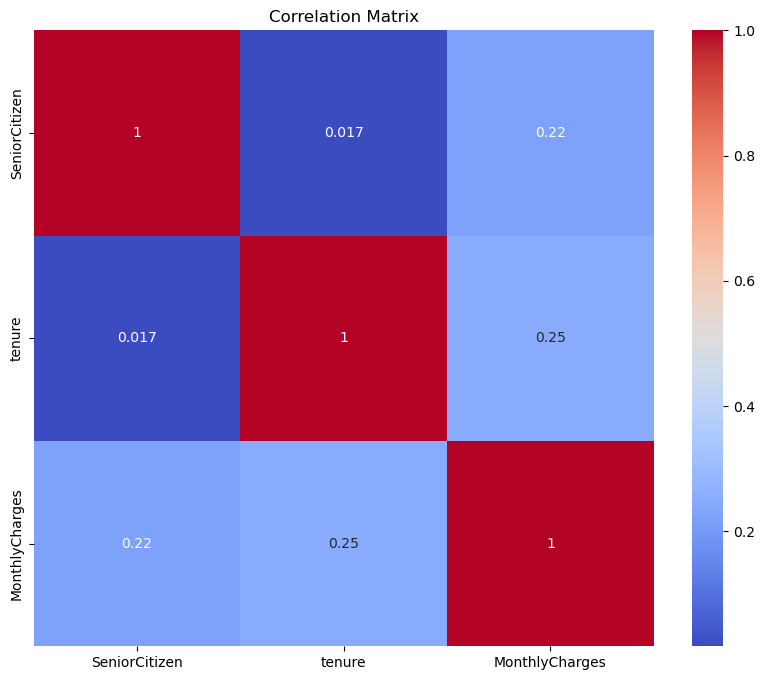

In [165]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

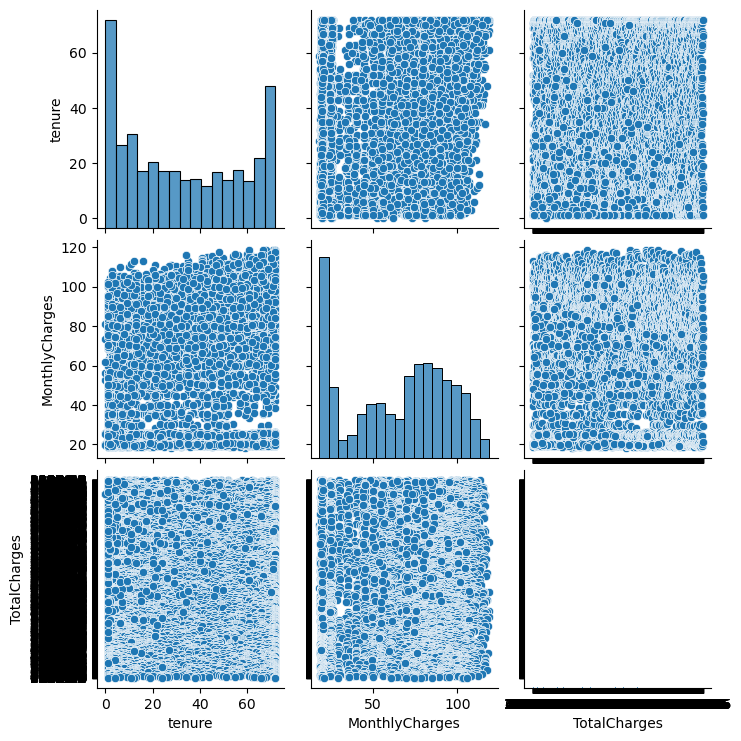

In [159]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(df, vars=numeric_cols)
plt.show()

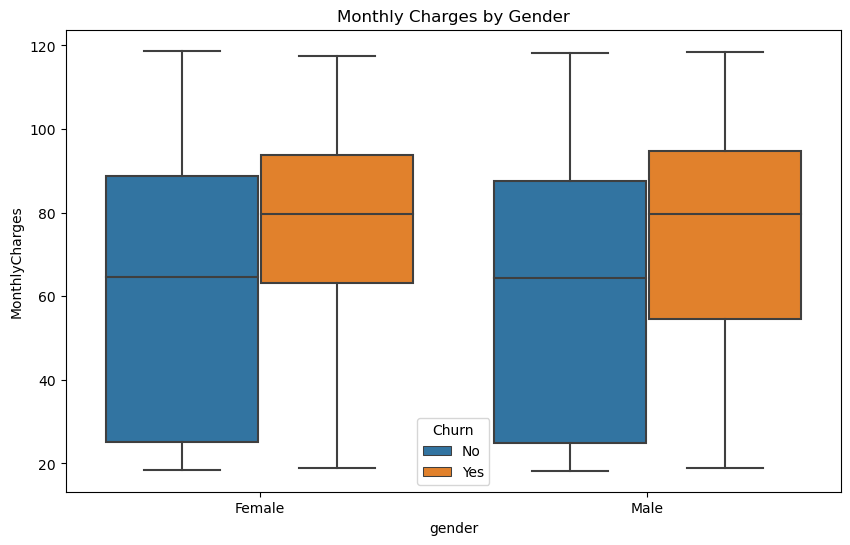

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='gender', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Gender')
plt.show()

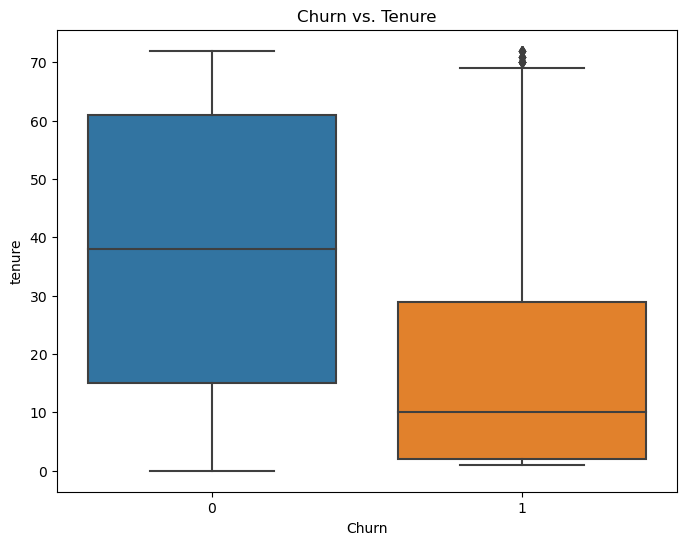

In [163]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=db, x='Churn', y='tenure')
plt.title('Churn vs. Tenure')
plt.show()


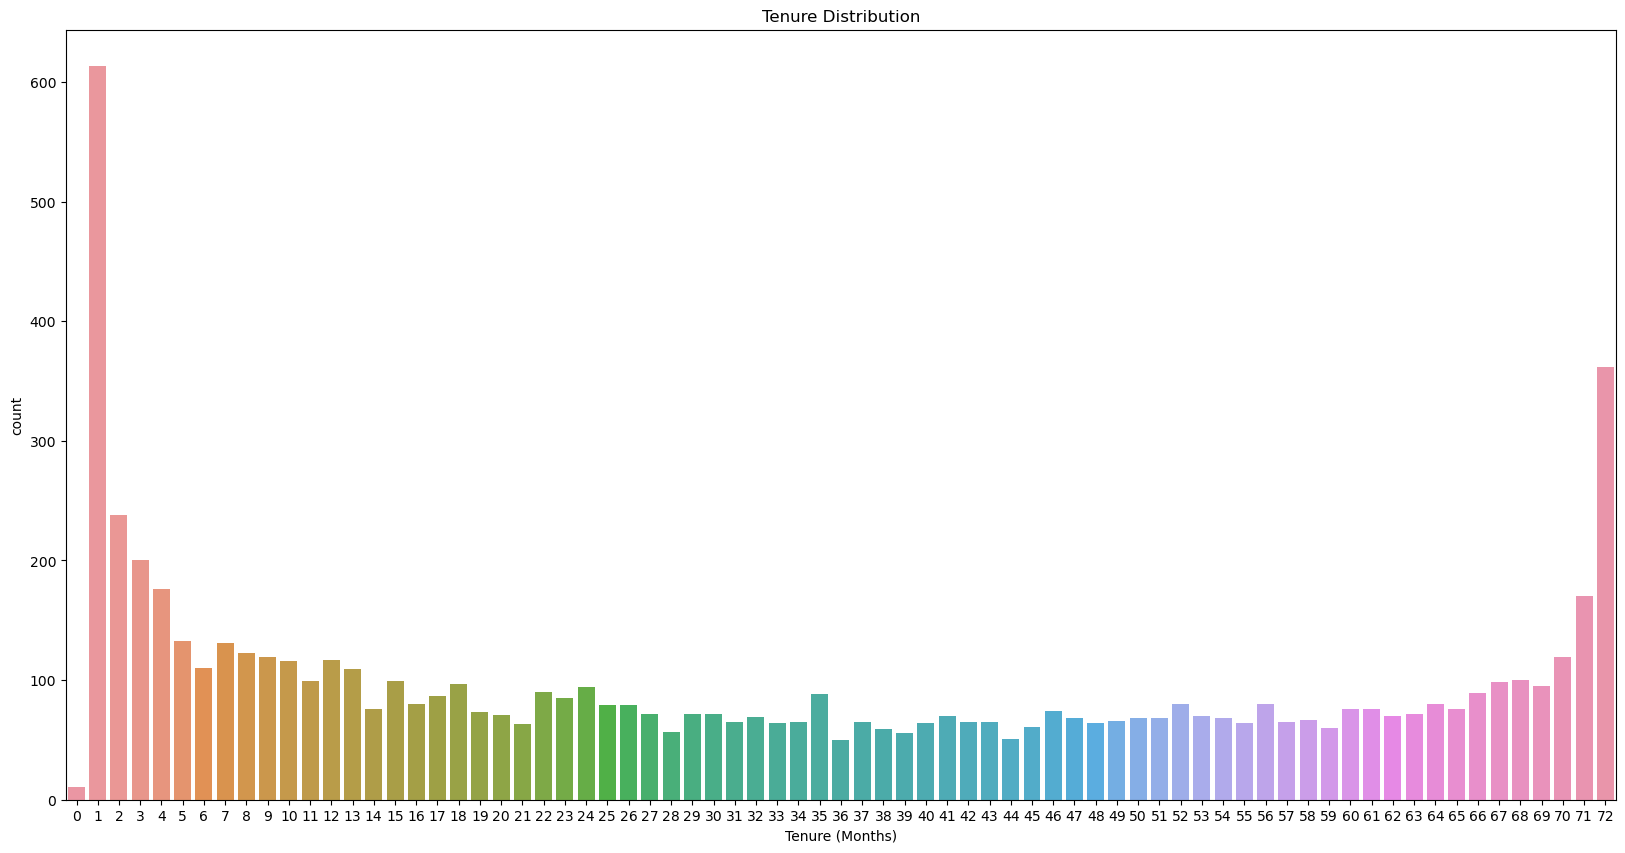

In [31]:
plt.figure(figsize=(20, 10))
sns.countplot(data=db, x='tenure')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.show()


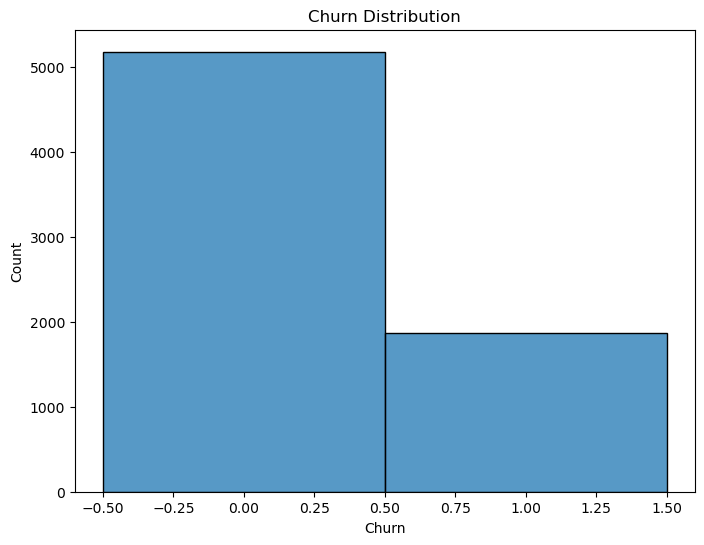

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=db, x='Churn', bins=2, discrete=True)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

#### Data preprocessing

Convert Categorical Variables to Numerical Using Label Encoding

In [54]:
# Convert categorical variables to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
# Create a dictionary to store label encoders for each categorical column
label_encoders = {}
# List of categorical columns to be label encoded
categorical_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'Churn']
# Iterate through each categorical column
for col in categorical_columns:
    le = LabelEncoder() # Create a LabelEncoder for the column
    db[col] = le.fit_transform(db[col]) # Apply Label Encoding to the column
    label_encoders[col] = le # Store the label encoder in the dictionary


In [55]:
db.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,1,0,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,0,2,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,0,2,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,1,0,2,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,1,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,1


In [7]:
db = db.T
print(db.head(5))

                     0           1           2           3           4     \
customerID     7590-VHVEG  5575-GNVDE  3668-QPYBK  7795-CFOCW  9237-HQITU   
gender             Female        Male        Male        Male      Female   
SeniorCitizen           0           0           0           0           0   
Partner                 1           0           0           0           0   
Dependents              0           0           0           0           0   

                     5           6           7           8           9     \
customerID     9305-CDSKC  1452-KIOVK  6713-OKOMC  7892-POOKP  6388-TABGU   
gender             Female        Male      Female      Female        Male   
SeniorCitizen           0           0           0           0           0   
Partner                 0           0           0           1           0   
Dependents              0           1           0           0           1   

               ...        7033        7034        7035        7036  \
cust

In [45]:
db = db.T
print(db.head())

   customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0  7590-VHVEG  Female             0       1          0      1            0   
1  5575-GNVDE    Male             0       0          0     34            1   
2  3668-QPYBK    Male             0       0          0      2            1   
3  7795-CFOCW    Male             0       0          0     45            0   
4  9237-HQITU  Female             0       0          0      2            1   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0             1               0              0  ...               No   
1             0               0              2  ...              Yes   
2             0               0              2  ...               No   
3             1               0              2  ...              Yes   
4             0               1              0  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No       

In [11]:
db = db.T
print(db.iloc[:5, :5])


   customerID  gender SeniorCitizen Partner Dependents
0  7590-VHVEG  Female             0       1          0
1  5575-GNVDE    Male             0       0          0
2  3668-QPYBK    Male             0       0          0
3  7795-CFOCW    Male             0       0          0
4  9237-HQITU  Female             0       0          0


In [66]:
from sklearn.model_selection import train_test_split

Perform one-hot encoding for categorical columns

In [67]:
datas = pd.get_dummies(db, columns=categorical_columns, drop_first=True)


In [69]:
print(datas.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'tenure', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Partner_1', 'Dependents_1', 'PhoneService_1',
       'MultipleLines_1', 'MultipleLines_2', 'InternetService_1',
       'InternetService_2', 'OnlineSecurity_1', 'OnlineSecurity_2', 'Churn_1'],
      dtype='object')


 Define the target variable

In [70]:
X = datas.drop('Churn_1', axis=1)
y = datas['Churn_1']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
data1.head()

,customerID,gender,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2,Churn_1
0,7590-VHVEG,Female,0,1,Yes,No,No,No,No,Month-to-month,...,1,0,0,1,0,0,0,0,0,0
1,5575-GNVDE,Male,0,34,No,Yes,No,No,No,One year,...,0,0,1,0,0,0,0,0,1,0
2,3668-QPYBK,Male,0,2,Yes,No,No,No,No,Month-to-month,...,0,0,1,0,0,0,0,0,1,1
3,7795-CFOCW,Male,0,45,No,Yes,Yes,No,No,One year,...,0,0,0,1,0,0,0,0,1,0
4,9237-HQITU,Female,0,2,No,No,No,No,No,Month-to-month,...,0,0,1,0,0,1,0,0,0,1


In [60]:
# Encode categorical variables using one-hot encoding
data2 = pd.get_dummies(db, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity'], drop_first=True)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X = data2.drop('Churn', axis=1)
y = data2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
data2.head()

,customerID,SeniorCitizen,tenure,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,gender_Male,Partner_1,Dependents_1,PhoneService_1,MultipleLines_1,MultipleLines_2,InternetService_1,InternetService_2,OnlineSecurity_1,OnlineSecurity_2
0,7590-VHVEG,0,1,Yes,No,No,No,No,Month-to-month,Yes,...,0,1,0,0,1,0,0,0,0,0
1,5575-GNVDE,0,34,No,Yes,No,No,No,One year,No,...,1,0,0,1,0,0,0,0,0,1
2,3668-QPYBK,0,2,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,45,No,Yes,Yes,No,No,One year,No,...,1,0,0,0,1,0,0,0,0,1
4,9237-HQITU,0,2,No,No,No,No,No,Month-to-month,Yes,...,0,0,0,1,0,0,1,0,0,0


In [93]:
db.dtypes

customerID          object
gender              object
SeniorCitizen       object
Partner              int32
Dependents           int32
tenure              object
PhoneService         int32
MultipleLines        int32
InternetService      int32
OnlineSecurity       int32
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn                int32
dtype: object

### Data Splitting

 Model Selection

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [137]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [138]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Assuming the target column is 'Churn'

In [140]:
target_column = 'Churn'

####  Exclude non-numeric or non-relevant columns

In [141]:
exclude_columns = ['customerID']

In [142]:
df = df.drop(exclude_columns, axis=1)

#### # Select features (X) and the target (y)

In [143]:
X = df.drop(target_column, axis=1)

In [144]:
y = df[target_column]

#### Perform one-hot encoding for all categorical columns

In [145]:
X_encoded = pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])

#### Split the data into training and testing sets

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

#### Initialize and train a Random Forest classifier

In [147]:
model = RandomForestClassifier()

Model Training

In [148]:
model.fit(X_train, y_train)

RandomForestClassifier()

####  Make predictions on the test data

In [149]:
y_pred = model.predict(X_test)

#### Evaluate the model

In [150]:
accuracy = accuracy_score(y_test, y_pred)

In [151]:
confusion = confusion_matrix(y_test, y_pred)

In [152]:
report = classification_report(y_test, y_pred)

In [153]:
print("Accuracy:", accuracy)

Accuracy: 0.7955997161107168


In [154]:
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[953  83]
 [205 168]]


In [155]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.92      0.87      1036
         Yes       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409

